<a href="https://colab.research.google.com/github/ETorresSacha/Analisis-de-datos/blob/main/analisis_datos_reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import os
from google.colab import files
import seaborn as sns
from sklearn import  preprocessing

In [ ]:

uploaded = files.upload()

Saving TEMP2.xlsx to TEMP2.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['TEMP2.xlsx']))

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
df.sort_values(by=['equipment','location','start_detention'],inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,reason,equipment,location,start_detention,end_detention,pay_number,id,comment,Minutos
0,MANTENCION NO PROGRAMADA,C301,8A,2021-10-04 21:53:48,2021-10-04 23:00:00,NaN,2674096,Alarma freno traba y servicio aplicado,67
1,MANTENCION NO PROGRAMADA,C301,8A,2021-10-04 23:00:00,2021-10-05 11:00:00,NaN,0,NaN,720
2,MANTENCION NO PROGRAMADA,C301,8A,2021-10-05 11:00:00,2021-10-05 23:00:00,NaN,0,NaN,720
3,MANTENCION NO PROGRAMADA,C301,8A,2021-10-05 23:00:00,2021-10-06 08:48:37,NaN,0,NaN,588
4,MANTENCION NO PROGRAMADA,C301,AUX001,2020-06-24 12:14:16,2020-06-24 13:22:06,NaN,2091922,Filtros congelados,68


In [ ]:
# Exportamos a excel los datos de mnp_caex
df.to_excel('mnp_caex.xlsx', index=False)


In [ ]:
# Descargar el archivo
files.download('mnp_caex.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ANÁLISIS DE DATOS DEL RUL
### TABLA TELEMETRÍA Y ALERTAS

In [ ]:
uploaded = files.upload()

Saving CAEX_RUL4.xlsx to CAEX_RUL4.xlsx


In [ ]:
# para borrar los datos que se sucbió
os.remove("CAEX_RUL4.xlsx")

In [ ]:
data = pd.read_excel(io.BytesIO(uploaded['CAEX_RUL4.xlsx']))

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


###  Paso 1 – Exploración inicial de la data (EDA básico).

In [ ]:
# Vista rápida de la estructura
print("Dimensiones del dataset:", data.shape)
print("\nTipos de datos:")
print(data.dtypes)

Dimensiones del dataset: (7524, 58)

Tipos de datos:
equipment                                          object
fecha_telemetria                           datetime64[ns]
Ambient_Temp_Ave                                  float64
Ambient_Temp_Max                                  float64
Ambient_Temp_Min                                  float64
Atmos_Pres_Ave                                    float64
Blow_by_Press_Max                                 float64
Boost_LB_Press_Max                                float64
Boost_RB_Press_Max                                float64
BRAKE_ENERGY                                      float64
Brake_Oil_Temp_LF_Ave                             float64
Brake_Oil_Temp_LF_Max                             float64
Brake_Oil_Temp_LR_Ave                             float64
Brake_Oil_Temp_LR_Max                             float64
Brake_Oil_Temp_RF_Ave                             float64
Brake_Oil_Temp_RF_Max                             float64
Brake_Oil_Temp_RR_A

In [ ]:
# Primeras filas
print("\nPrimeras 5 filas:")
display(data.head())


Primeras 5 filas:


,equipment,fecha_telemetria,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,Boost_LB_Press_Max,Boost_RB_Press_Max,BRAKE_ENERGY,...,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,horometro,fecha_inicio,RUL_Horas
0,C301,2021-01-13 18:23:40,14.0,25.0,5.0,580.0,2.0,268.0,258.0,1.0,...,6570.0,20290.0,6580.0,20230.0,223.0,2953.0,2963.0,38538,2021-01-13 20:11:01,2
1,C301,2021-01-18 23:30:42,14.0,35.0,6.0,580.0,2.0,270.0,259.0,3.0,...,6630.0,20750.0,6650.0,20440.0,223.0,2779.0,2695.0,38598,2021-01-19 08:05:10,9
2,C301,2021-04-30 21:49:45,9.0,24.0,0.0,580.0,1.0,266.0,266.0,4.0,...,6620.0,21240.0,6630.0,20890.0,204.0,2487.0,2502.0,39378,2021-05-01 08:45:43,11
3,C301,2021-05-06 21:52:31,9.0,29.0,0.0,580.0,1.0,266.0,266.0,5.0,...,6960.0,20120.0,6970.0,21680.0,203.0,2663.0,2665.0,39478,2021-05-07 06:55:36,9
4,C301,2021-05-14 08:21:45,9.0,22.0,1.0,580.0,1.0,268.0,271.0,7.0,...,6670.0,20530.0,6670.0,20270.0,204.0,2446.0,2413.0,39618,2021-05-15 09:36:48,25


In [ ]:
# Resumen estadístico de todas las columnas numéricas
print("\nResumen estadístico:")
display(data.describe())


Resumen estadístico:


,fecha_telemetria,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,Boost_LB_Press_Max,Boost_RB_Press_Max,BRAKE_ENERGY,Brake_Oil_Temp_LF_Ave,...,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,horometro,fecha_inicio,RUL_Horas
count,7524,7521.000000,7475.000000,7475.000000,7521.000000,6780.000000,7521.000000,6772.000000,7521.000000,7521.000000,...,7521.000000,7044.000000,7521.000000,7044.000000,7521.000000,7521.000000,7521.000000,7524.000000,7524,7524.000000
mean,2021-08-13 06:49:31.575491584,11.559101,28.018595,-3.872107,586.653371,1.519764,265.789124,262.372120,4.259008,54.834596,...,7051.227230,20825.139125,7049.375083,20858.344691,220.660152,2458.836325,2458.842308,35753.889421,2021-08-14 21:00:43.675704576,38.223285
min,2019-08-07 07:22:27,-133.000000,-62.000000,-272.000000,310.000000,0.000000,158.000000,157.000000,0.000000,-114.000000,...,0.000000,4690.000000,0.000000,4780.000000,0.000000,0.000000,0.000000,10529.000000,2020-01-05 11:02:53,0.000000
25%,2021-04-19 06:14:33.500000,8.000000,23.000000,0.000000,580.000000,1.000000,260.000000,256.000000,0.000000,49.000000,...,7040.000000,20200.000000,7040.000000,20140.000000,212.000000,2401.000000,2394.000000,27294.000000,2021-04-19 17:26:36.750000128,3.000000
50%,2021-08-02 10:26:56.500000,12.000000,28.000000,2.000000,580.000000,1.000000,266.000000,261.000000,2.000000,56.000000,...,7470.000000,20680.000000,7470.000000,20690.000000,217.000000,2603.000000,2605.000000,40234.500000,2021-08-11 06:01:49,8.000000
75%,2021-12-16 11:48:59.500000,16.000000,33.000000,5.000000,590.000000,2.000000,272.000000,268.000000,5.000000,61.000000,...,7920.000000,21270.000000,7920.000000,21390.000000,222.000000,2799.000000,2804.000000,42526.000000,2021-12-16 17:00:48.750000128,20.000000
max,2022-03-23 01:49:59,31.000000,53.000000,17.000000,660.000000,5.000000,334.000000,322.000000,106.000000,79.000000,...,9600.000000,28640.000000,9590.000000,28380.000000,326.000000,3573.000000,3568.000000,47697.000000,2022-03-23 11:28:03,8622.000000
std,NaN,6.044053,7.194091,37.278781,13.720546,0.657247,10.351415,10.002498,6.716796,9.701271,...,1934.791283,1003.463968,1934.143588,1124.029125,24.113146,679.225194,680.441818,9956.292594,NaN,167.076490


In [ ]:
# Revisar si hay valores nulos
print("\nValores nulos por columna:")
display(data.isnull().sum())


Valores nulos por columna:


,0
equipment,0
fecha_telemetria,0
Ambient_Temp_Ave,3
Ambient_Temp_Max,49
Ambient_Temp_Min,49
Atmos_Pres_Ave,3
Blow_by_Press_Max,744
Boost_LB_Press_Max,3
Boost_RB_Press_Max,752
BRAKE_ENERGY,3


In [ ]:
# Distribución de equipos
print("\nCantidad de registros por ID de equipo:")
display(data['equipment'].value_counts())


Cantidad de registros por ID de equipo:


,count
equipment,
C305,284
C323,279
C310,278
C306,275
C311,274
C318,272
C307,270
C327,269
C322,268



Distribución de RUL:


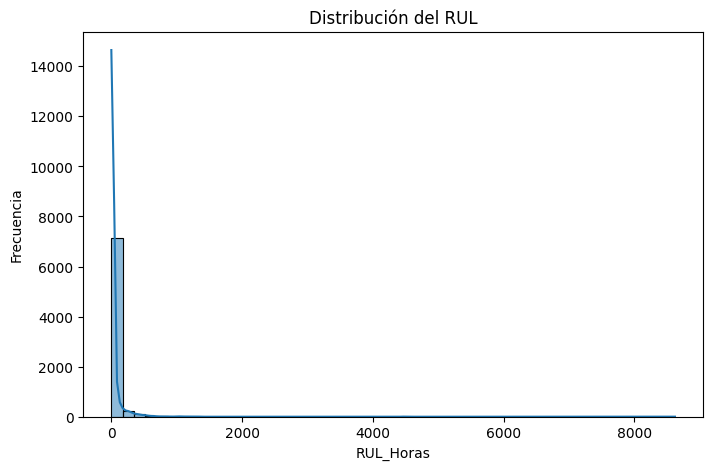

In [ ]:
# Distribución de RUL
print("\nDistribución de RUL:")
plt.figure(figsize=(8,5))
sns.histplot(data['RUL_Horas'], bins=50, kde=True)
plt.title("Distribución del RUL")
plt.xlabel("RUL_Horas")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# Rango de fechas
if 'fecha_telemetria' in data.columns and 'fecha_inicio' in data.columns:
    print("\nRango de fechas (inicio y fin):")
    print("Fecha mínima:", data['fecha_telemetria'].min(), "| Fecha máxima:", data['fecha_inicio'].max())


Rango de fechas (inicio y fin):
Fecha mínima: 2019-08-07 07:22:27 | Fecha máxima: 2022-03-23 11:28:03


# Paso 2: Limpieza inicial de datos

In [ ]:
# ======================
# 1. Eliminar valores imposibles
# ======================

# Definimos rangos razonables para ciertas variables
rango_temp = (-50, 150)  # temperaturas en °C
rango_presion = (0, 500) # presión en PSI o kPa (depende tu sensor)
rango_rul = (0, 5000)    # recorte opcional para evitar colas largas